In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Restaurant_Reviews.tsv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 15, saw 3


In [3]:
df=pd.read_csv('Restaurant_Reviews.tsv',sep='\t')

In [4]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df['Review']=df['Review'].str.lower()

In [6]:
df.head()

,Review,Liked
0,wow... loved this place.,1
1,crust is not good.,0
2,not tasty and the texture was just nasty.,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


In [7]:
import string
string.punctuation
exclude=string.punctuation

In [8]:
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def remove_punc(x):
    for i in exclude:
        x=x.replace(i,' ')
    return x

In [10]:
remove_punc('hey!! , how are you????')

'hey     how are you    '

In [11]:
df['Review']=df['Review'].apply(remove_punc)

In [12]:
df.head()

,Review,Liked
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
tf = TfidfVectorizer()
X=tf.fit_transform(df['Review']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
X.shape

(1000, 2035)

In [16]:
Y=df['Liked']

In [17]:
Y.head()

,Liked
0,1
1,0
2,0
3,1
4,1


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [20]:
xtrain.shape

(800, 2035)

In [21]:
from keras.models import Sequential
from keras.layers import Input ,Dense , Dropout
from keras.callbacks import EarlyStopping

In [26]:
model= Sequential()
model.add(Input(shape=(xtrain.shape[1],)))
model.add(Dense(units=128 , activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=64 , activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=1 , activation='sigmoid'))

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['accuracy'])

In [28]:
es=EarlyStopping(monitor='val_loss',patience=15)

In [29]:
hist = model.fit(xtrain,ytrain , validation_split=0.1,epochs=200 , callbacks=[es])

Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.5085 - loss: 0.6933 - val_accuracy: 0.6250 - val_loss: 0.6894
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6183 - loss: 0.6831 - val_accuracy: 0.6500 - val_loss: 0.6816
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7333 - loss: 0.6617 - val_accuracy: 0.7125 - val_loss: 0.6570
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8628 - loss: 0.5887 - val_accuracy: 0.8250 - val_loss: 0.5863
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9126 - loss: 0.4492 - val_accuracy: 0.8125 - val_loss: 0.5023
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9426 - loss: 0.2726 - val_accuracy: 0.8375 - val_loss: 0.4443
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9717 - loss: 0.1481 - val_accuracy: 0.8750 - val_loss: 0.4297
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9837 - loss: 0.0868 - val_accuracy: 0.87

In [30]:
model.evaluate(xtrain,ytrain)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9978 - loss: 0.0087    


[0.06375066936016083, 0.9825000166893005]

In [31]:
model.evaluate(xtest,ytest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7880 - loss: 0.6110


[0.6160823702812195, 0.7799999713897705]

In [32]:
yprob_train=model.predict(xtrain)
yprob_test=model.predict(xtest)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [33]:
yprob_train[:5]

array([[5.73618818e-05],
       [1.16590265e-04],
       [1.09568457e-04],
       [1.38483156e-05],
       [1.08846478e-04]], dtype=float32)

In [34]:
ypred_tr=[]
for i in yprob_train:
  if i<0.5:
    ypred_tr.append(0)
  else:
    ypred_tr.append(1)

In [35]:
ypred_tr[:5]

[0, 0, 0, 0, 0]

In [36]:
ypred_ts=[]
for i in yprob_test:
  if i<0.5:
    ypred_ts.append(0)
  else:
    ypred_ts.append(1)

In [37]:
ypred_ts[:5]


[1, 0, 0, 0, 1]

In [38]:
ytest.head()

,Liked
579,1
325,1
955,0
506,0
910,0


In [39]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

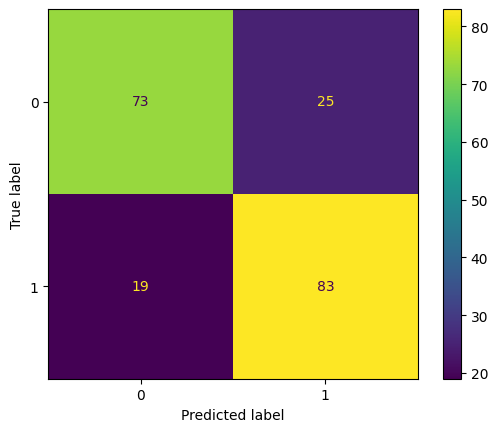

In [40]:
cf= confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

In [41]:
st=input('enter your review')
stl=st.lower()
strm=remove_punc(stl)
sttf=tf.transform([strm]).toarray()

enter your reviewi hate it


In [42]:
pred=model.predict([sttf])

if pred>0.5:
  print('positive review')
else:
  print('negative review')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
negative review


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(1, 2035))',)
  warnings.warn(msg)
